# EDA

**Target:** Exited: Si le client a résilié (1: oui, 0: non)

In [37]:
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import sys

# Load configuration
sys.path.append('../')

from utils import RANDOM_STATE, TEST_SIZE

In [3]:
# Load the data
df = pd.read_csv('../data/train_data.csv')
df.head()

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0


On sépare le dataset en une partie train et test set

In [4]:
y = df.pop('Exited')
X = df.copy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

print(f"The X_train set contains: {X_train.shape} elements")
print(f"The y_train set contains: {y_train.shape} elements")
print(f"The X_test set contains: {X_test.shape} elements")
print(f"The y_test set contains: {y_test.shape} elements")

The X_train set contains: (114863, 13) elements
The y_train set contains: (114863,) elements
The X_test set contains: (28716, 13) elements
The y_test set contains: (28716,) elements


In [5]:
# Concatenate X_train and y_train to create the training DataFrame
train_df = pd.concat([X_train, y_train], axis=1)

# Concatenate X_test and y_test to create the test DataFrame
test_df = pd.concat([X_test, y_test], axis=1)

print("train_df shape:", train_df.shape)
print("test_df shape:", test_df.shape)

print(train_df.head())

train_df shape: (114863, 14)
test_df shape: (28716, 14)
            ID  CustomerId   Surname  CreditScore Geography  Gender   Age  \
116452    6733    15773869  Onwudiwe          758    France    Male  38.0   
42249   133334    15783501       Kao          598   Germany    Male  35.0   
84801   161055    15628523     Chien          724    France  Female  33.0   
61695   161545    15613772   Maclean          683    France  Female  34.0   
5752    119591    15806941  Chidubem          639    France  Female  25.0   

        Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
116452       3       0.00              2        1.0             1.0   
42249        7  135870.80              1        1.0             1.0   
84801        3       0.00              2        1.0             1.0   
61695        9       0.00              2        0.0             1.0   
5752         2  121326.52              1        1.0             1.0   

        EstimatedSalary  Exited  
116452         93624

In [6]:
train_df.isna().any().to_frame(name='Contient NaN')

,Contient NaN
ID,False
CustomerId,False
Surname,False
CreditScore,False
Geography,False
Gender,False
Age,False
Tenure,False
Balance,False
NumOfProducts,False


**Observations:** Il n´y a pas de valeurs manquantes

In [7]:
train_df.dtypes.value_counts()

int64      6
float64    5
object     3
Name: count, dtype: int64

In [8]:
train_df.dtypes

ID                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
train_df.describe()

,ID,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,114863.000000,1.148630e+05,114863.000000,114863.000000,114863.000000,114863.000000,114863.000000,114863.000000,114863.000000,114863.000000,114863.000000
mean,82568.369989,1.569197e+07,656.524947,38.139767,5.021069,55509.177787,1.553538,0.754046,0.497097,112504.938242,0.211809
std,47641.832028,7.138472e+04,80.008532,8.870904,2.807091,62804.248897,0.546911,0.430653,0.499994,50300.140367,0.408592
min,0.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41322.000000,1.563288e+07,598.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74532.020000,0.000000
50%,82553.000000,1.569018e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.880000,0.000000
75%,123815.500000,1.575666e+07,710.000000,42.000000,7.000000,119912.460000,2.000000,1.000000,1.000000,155023.930000,0.000000
max,165033.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


**Observations:** 
Le dataset se compose des variables suivantes:
* Variables discrètes: *ID, CustomerId, Surname, Geography, Gender, NumOfProducts, HasCrCard, IsActiveMember, Exited (Target)*

* Variables continues: *CreditScore, Age, Tenure, Balance, EstimatedSalary*

## 1. Analyse des variables discrètes

On va exclure la column *'ID'* de l´analyse car elle ne sert uniquement qu´à l´évaluation dans Kaggle

### 1.1 Analyse de la variable 'Exited' (Target)


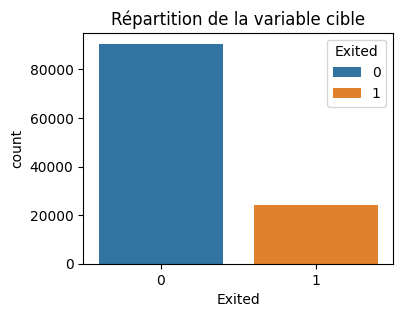

In [113]:
plt.figure(figsize=(4,3))
plt.title('Répartition de la variable cible')
sns.countplot(data=train_df, x='Exited', hue='Exited')
plt.show()

**Observations:** 

- Une majorité de client n´ont pas résilié.

- La répartition de la variable target est déséquilibré.

### 1.2 Analyse de la variable CustomerID

In [11]:
nr_entree_client = train_df.CustomerId.value_counts().value_counts()
nr_entree_client.describe(percentiles=[.1, 0.2, .99, 1])

count      64.000000
mean      316.312500
std      1075.493344
min         1.000000
10%         1.000000
20%         2.600000
50%        25.000000
99%      4578.080000
100%     8222.000000
max      8222.000000
Name: count, dtype: float64

In [106]:
print(f"Nombre de CustomerId unique dans le jeu de données: {train_df.CustomerId.nunique()}")
print("\n--- Dénombre les entrées par CustomerId ---\n")
pprint(train_df.CustomerId.value_counts().sort_index())
print("\n --- Répartition des CustomerId --- \n")
pprint(train_df.CustomerId.value_counts().describe(percentiles=[.4, 0.41, .99, 1]))

Nombre de CustomerId unique dans le jeu de données: 20244

--- Dénombre les entrées par CustomerId ---

CustomerId
15565701     2
15565706     4
15565714     3
15565779     5
15565796     3
            ..
15815630     1
15815645    10
15815660     2
15815670     1
15815690     6
Name: count, Length: 20244, dtype: int64

 --- Répartition des CustomerId --- 

count    20244.000000
mean         5.673928
std          7.229263
min          1.000000
40%          1.000000
41%          2.000000
50%          2.000000
99%         33.000000
100%        90.000000
max         90.000000
Name: count, dtype: float64


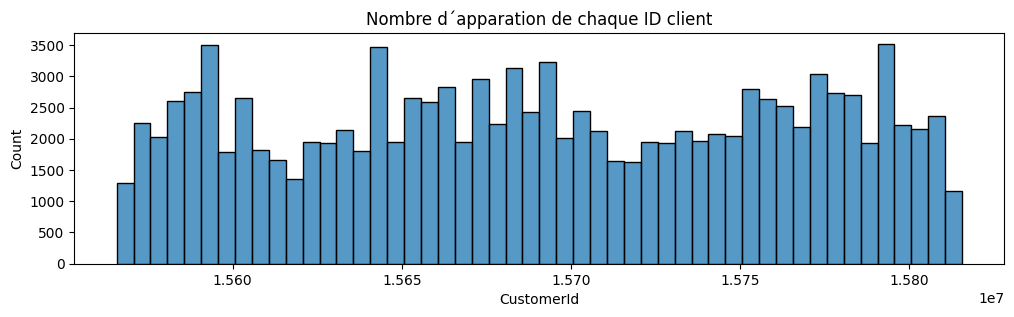

In [112]:
plt.figure(figsize=(12,3))
plt.title('Nombre d´apparation de chaque ID client')
sns.histplot(data=train_df, x='CustomerId')
plt.show()

**Observations:**
* 40% des clients n´ont qu´une seule entrée.
* Un client cumule 90 entrées et semble très éloigné de la moyenne.
* En moyenne un client est représenté 5,6 ± 7,2.

### 1.3 Surname

In [105]:
print("\n--- Dénombre les Surnames ---")
print(train_df.Surname.value_counts().sort_index())


--- Dénombre les Surnames ---
Surname
Abazu       1
Abbie       3
Abbott     17
Abdulov     7
Abel        2
           ..
Zox        11
Zubarev     3
Zuev       12
Zuyev      39
Zuyeva     43
Name: count, Length: 2703, dtype: int64


([], [])

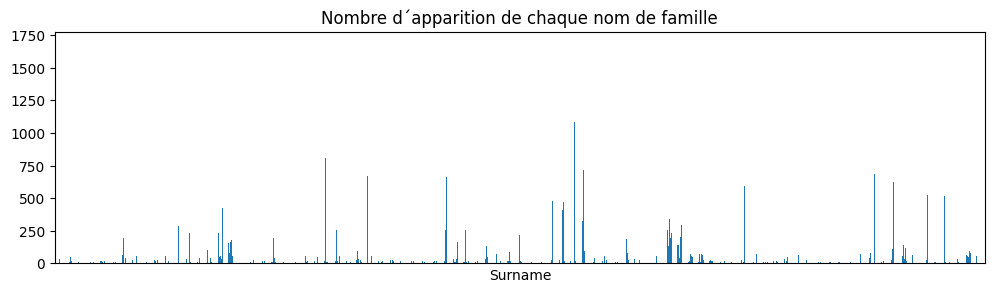

In [111]:
plt.title('Nombre d´apparition de chaque nom de famille')
train_df.Surname.value_counts().sort_index().plot(kind='bar', figsize=(12,3))
plt.xticks([])

**Observations:**
* Il y a 2703 nom de famille dans le dataset.

### 1.4 Geography

In [78]:
print("\n--- Dénombre la feature 'Geography' ---")
print(train_df.Geography.value_counts())


--- Dénombre la feature 'Geography' ---
Geography
France     65578
Spain      25248
Germany    24037
Name: count, dtype: int64


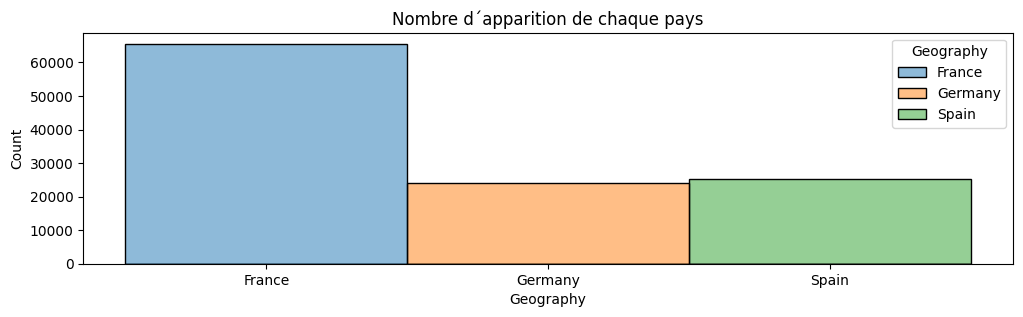

In [110]:
data = train_df.Geography.value_counts(ascending=False)
plt.figure(figsize=(12,3))
plt.title('Nombre d´apparition de chaque pays')
sns.histplot(data=train_df, x='Geography', hue='Geography')
plt.show()

**Observations:**
* Une majorité des observations viennent de France.
* Les données sont issues des banques francaises, allemandes, espagnoles.

### 1.5 Gender

In [103]:
print("\n--- Dénombre la feature 'Gender' ---")
print(train_df.Gender.value_counts().sort_index())


--- Dénombre la feature 'Gender' ---
Gender
Female    50037
Male      64826
Name: count, dtype: int64


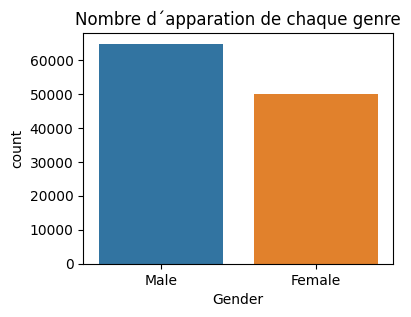

In [115]:
plt.figure(figsize=(4,3))
plt.title("Nombre d´apparation de chaque genre")
sns.countplot(data=train_df, x='Gender', hue='Gender')
plt.show()

**Observations:** Les hommes sont légèrement plus représenté que les femmes dans le dataset.

### 1.6 NumOfProducts

In [102]:
print("\n--- Dénombre la feature 'NumOfProducts' ---")
print(train_df.NumOfProducts.value_counts().sort_index())


--- Dénombre la feature 'NumOfProducts' ---
NumOfProducts
1    53938
2    58598
3     1998
4      329
Name: count, dtype: int64


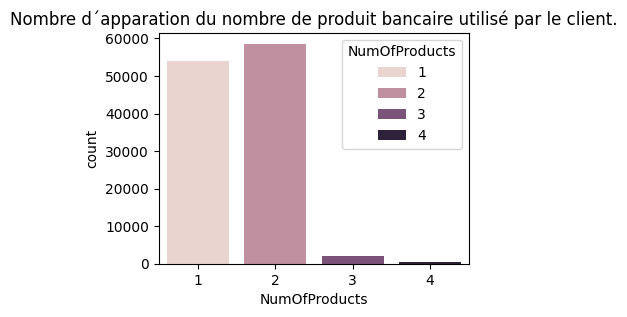

In [118]:
plt.figure(figsize=(4,3))
plt.title("Nombre d´apparation du nombre de produit bancaire utilisé par le client.")
sns.countplot(data=train_df, x='NumOfProducts', hue='NumOfProducts')
plt.show()

**Observations:** 
* Une large majorité de clients utilisent 1 ou 2 produits bancaires.
* Au maximum 4 produits bancaires sont utilisés par les clients.

### 1.7 HasCrCard

In [119]:
print("\n--- Dénombre la feature 'HasCrCard' ---")
print(train_df.HasCrCard.value_counts().sort_index())


--- Dénombre la feature 'HasCrCard' ---
HasCrCard
0.0    28251
1.0    86612
Name: count, dtype: int64


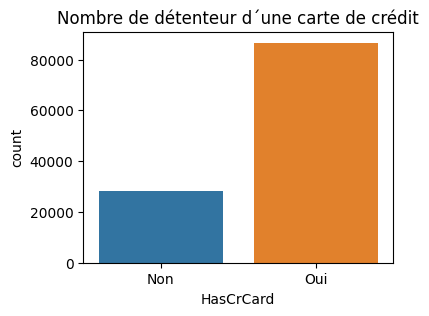

In [128]:
plt.figure(figsize=(4,3))
plt.title("Nombre de détenteur d´une carte de crédit")
sns.countplot(data=train_df, x='HasCrCard', hue='HasCrCard')
plt.xticks([0, 1], ['Non', 'Oui'])
plt.legend([],[], frameon=False)
plt.show()

**Observations:** Une large majorité de client possède une carte de crédit.

### 1.8 IsActiveMember

In [129]:
print("\n--- Dénombre les clients actifs ---")
print(train_df.IsActiveMember.value_counts().sort_index())


--- Dénombre les clients actifs ---
IsActiveMember
0.0    57765
1.0    57098
Name: count, dtype: int64


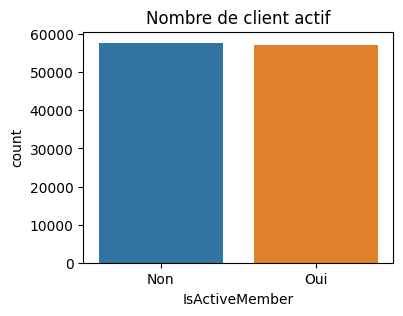

In [130]:
plt.figure(figsize=(4,3))
plt.title("Nombre de client actif")
sns.countplot(data=train_df, x='IsActiveMember', hue='IsActiveMember')
plt.xticks([0, 1], ['Non', 'Oui'])
plt.legend([],[], frameon=False)
plt.show()

**Observations:** On a autant de client actif qu´inactif dans le jeu de donnée.



## 2. Analyse des variables continues
### 2.1 CreditScore

### 2.2 Age

**Observations:**

### 2.3 Tenure

**Observations:**

### 2.4 Balance

**Observations:**

### 2.5 EstimatedSalary

**Observations:**

**Idées:**
* Plusieurs clients partagent le même nom car il y 2703 nom de famille et  20244 customer ID. 